# Social Media Analytics - Assignment - Predict Who Is More Influential In A Social Network

**Team Members - MSBA '24:**
- Madeleine Cope (mrc4387)
- David Gong (dg38767)
- Ali Khan (ask3467)
- Teagan Milford (tm38292)
- Spandan Pal (sp54969)
- Teja Sirigina (ts37662)
- Raghav Vaidya (rv25256)

# ***Objective***

The objective of this group assignment is to

(i)	Use Network Analytics to identify predictors of influence and detect social “influencers”

(ii)	Quantify the financial value of influence

(iii) Identify and leverage influencers from a given network



# ***Approach***

At first, we will use the dataset from http://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network to build and validate a model to identify the predictors of influence.

Secondly, we will evaluate the lift in expected net profit due to promotions when the analytics model is being deployed versus when no model is being used. Moreover we will also quantify the lift in expected net profit if a perfect model is used.

Finally, we will utilize the identified predictors of influence from the analytics model to point out the social "influencers" from a given network. In this case, we will build the network from a sample set of Twitter content or tweets.

# ***Part 1*** *- Find Predictors of Influence*

For this, we are only using the training set from http://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network to build and validate a model.

This dataset contains several attributes *(follower_count, retweet_count, post_count)* for two sets of Twitter users. We also have three network features representing degree, betweeness and closeness respectively for the given user. Moreover, the field **"Choice"** captures the direction of influence. *{A > B (Choice = 1) or B > A (Choice = 0)}


In [ ]:
# This needs to be run on Google Collab

#import necessary modules
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read training data csv
source_train_df = pd.read_csv("train.csv")

source_train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


We start of by looking at or exploring the dataset. This is a precursor to the model building activity.

This is would be helpful in data cleansing (if required) or in identifying feature engineering steps.


In [ ]:
source_train_df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [ ]:
# check for null records
source_train_df.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [ ]:
# check data desctribution
source_train_df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


We can also try visualization to better understand the data distribution

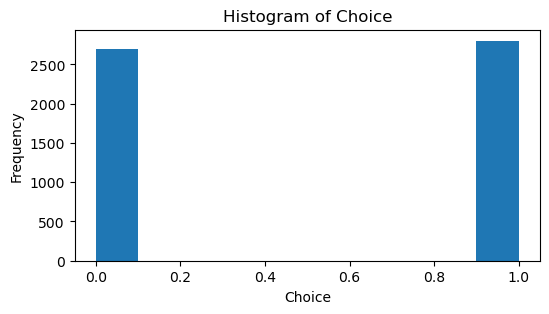

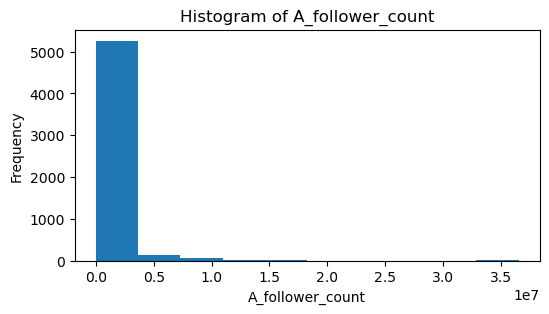

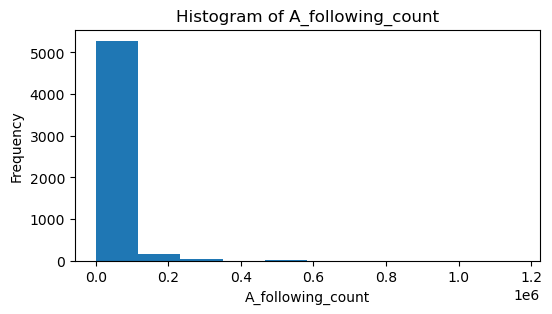

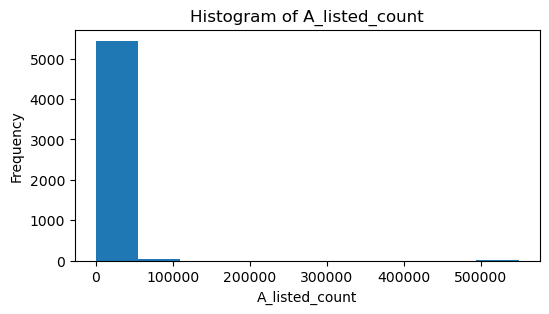

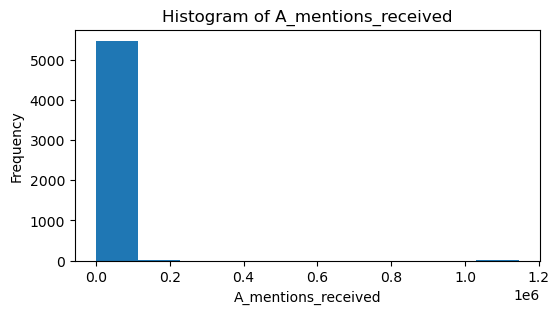

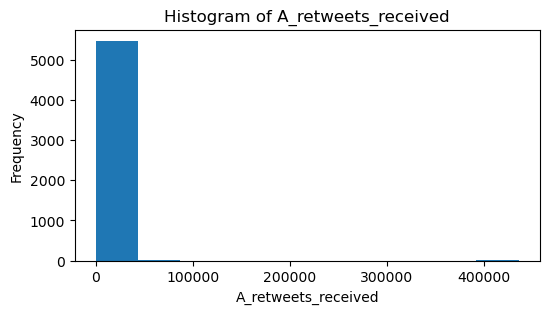

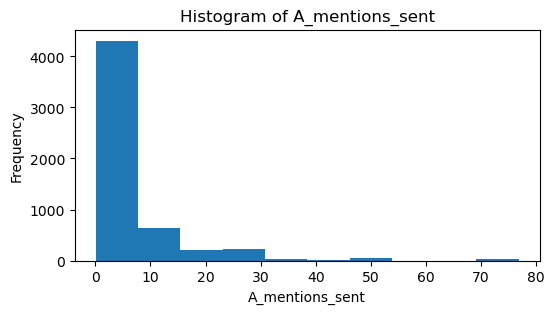

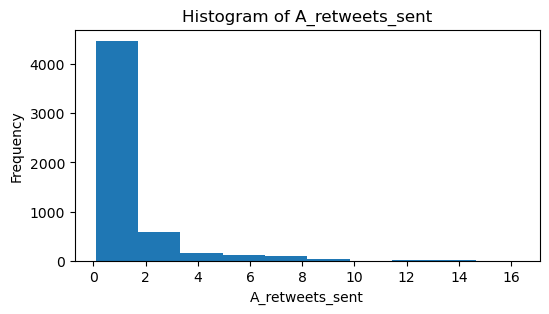

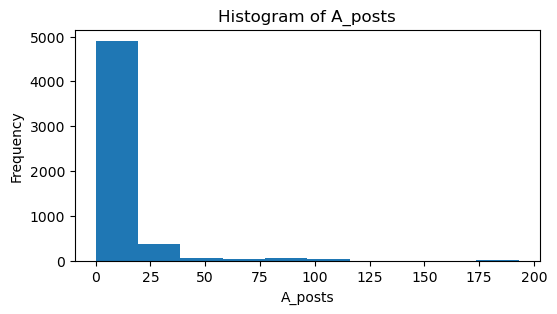

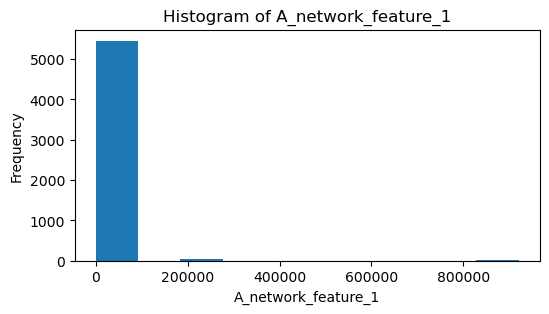

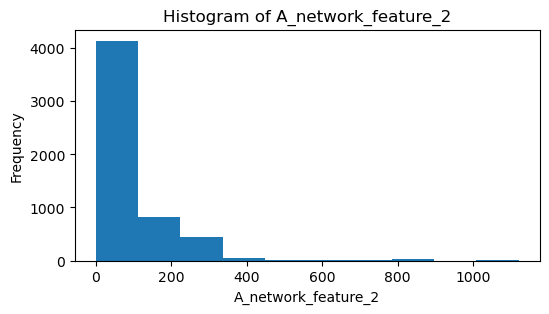

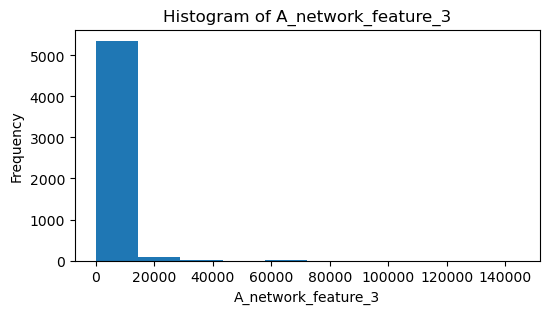

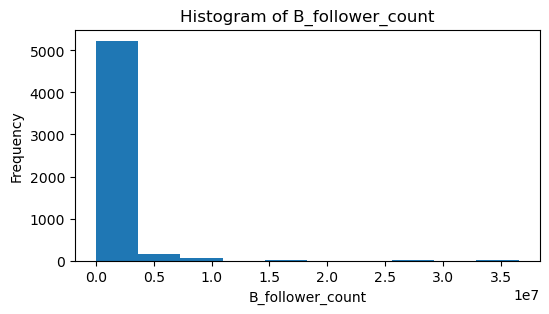

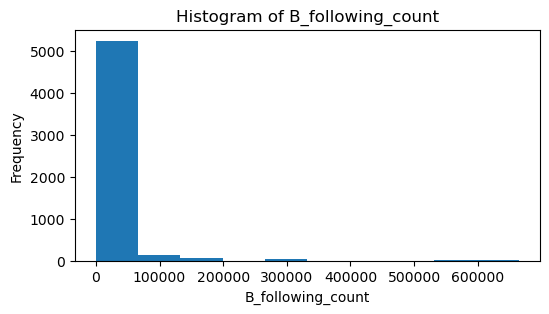

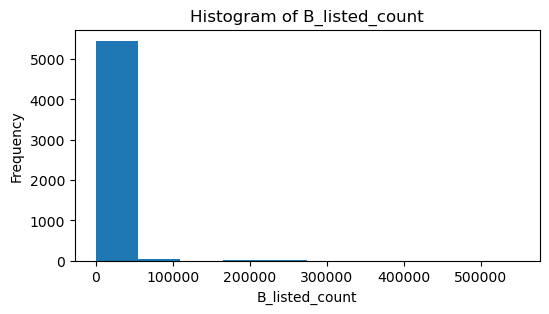

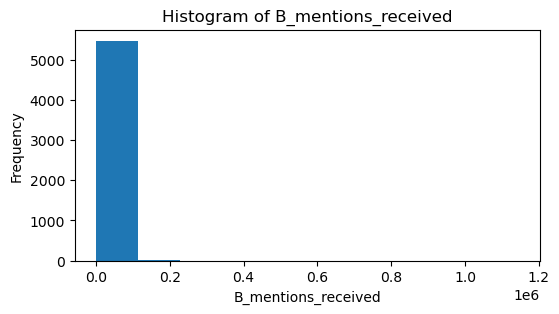

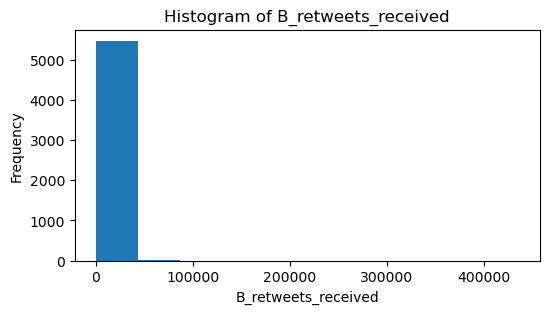

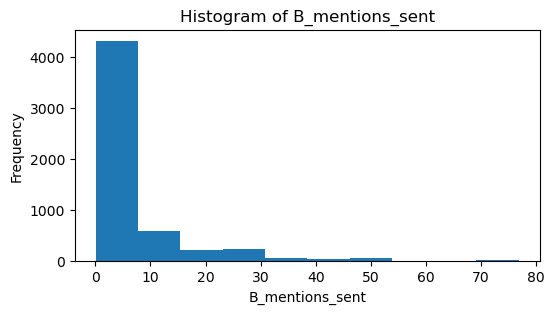

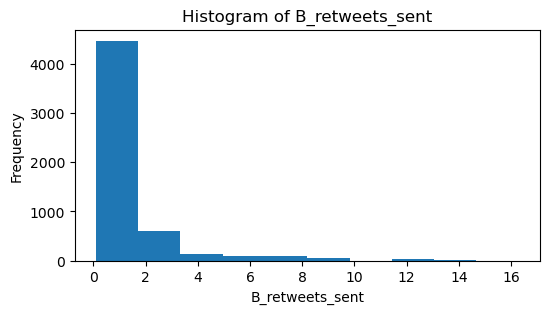

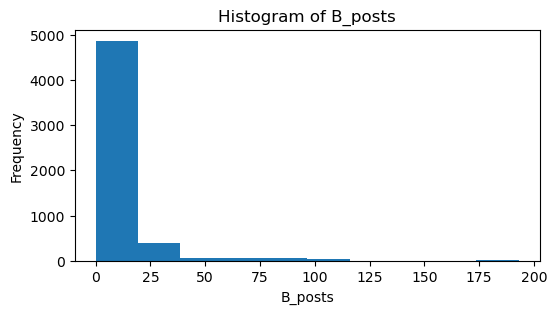

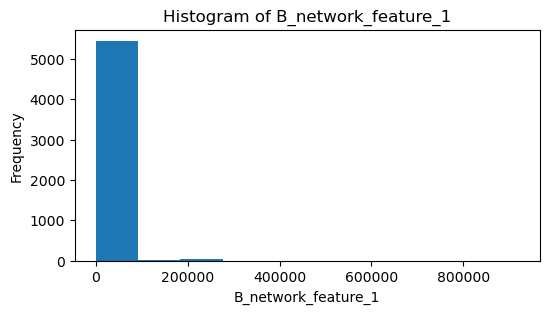

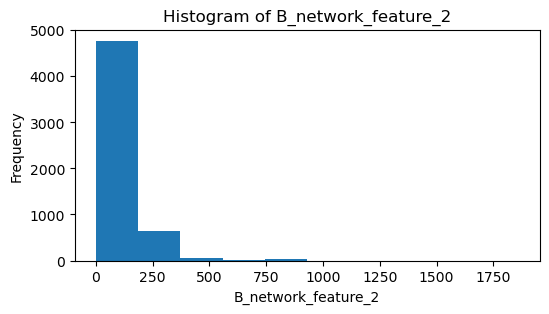

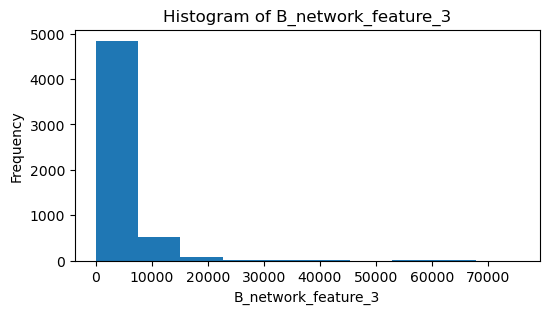

In [ ]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_train_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        source_train_df[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
    else:
        plt.pyplot.figure(figsize=(6, 3))
        plt.pyplot.hist(source_train_df[column_name])
        plt.pyplot.xlabel(column_name)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.title("Histogram of "+column_name)

From the above graphs, we see that as expected most of the users have a low number of followers, or retweets, or mentions.

While at the same time, a small set of users have a large number of followers, or retweets, or mentions. These are the "influencers"

***
Moreover, we can find the correlation matrix for all the fields. We plot this as a heat map for visualization purposes.

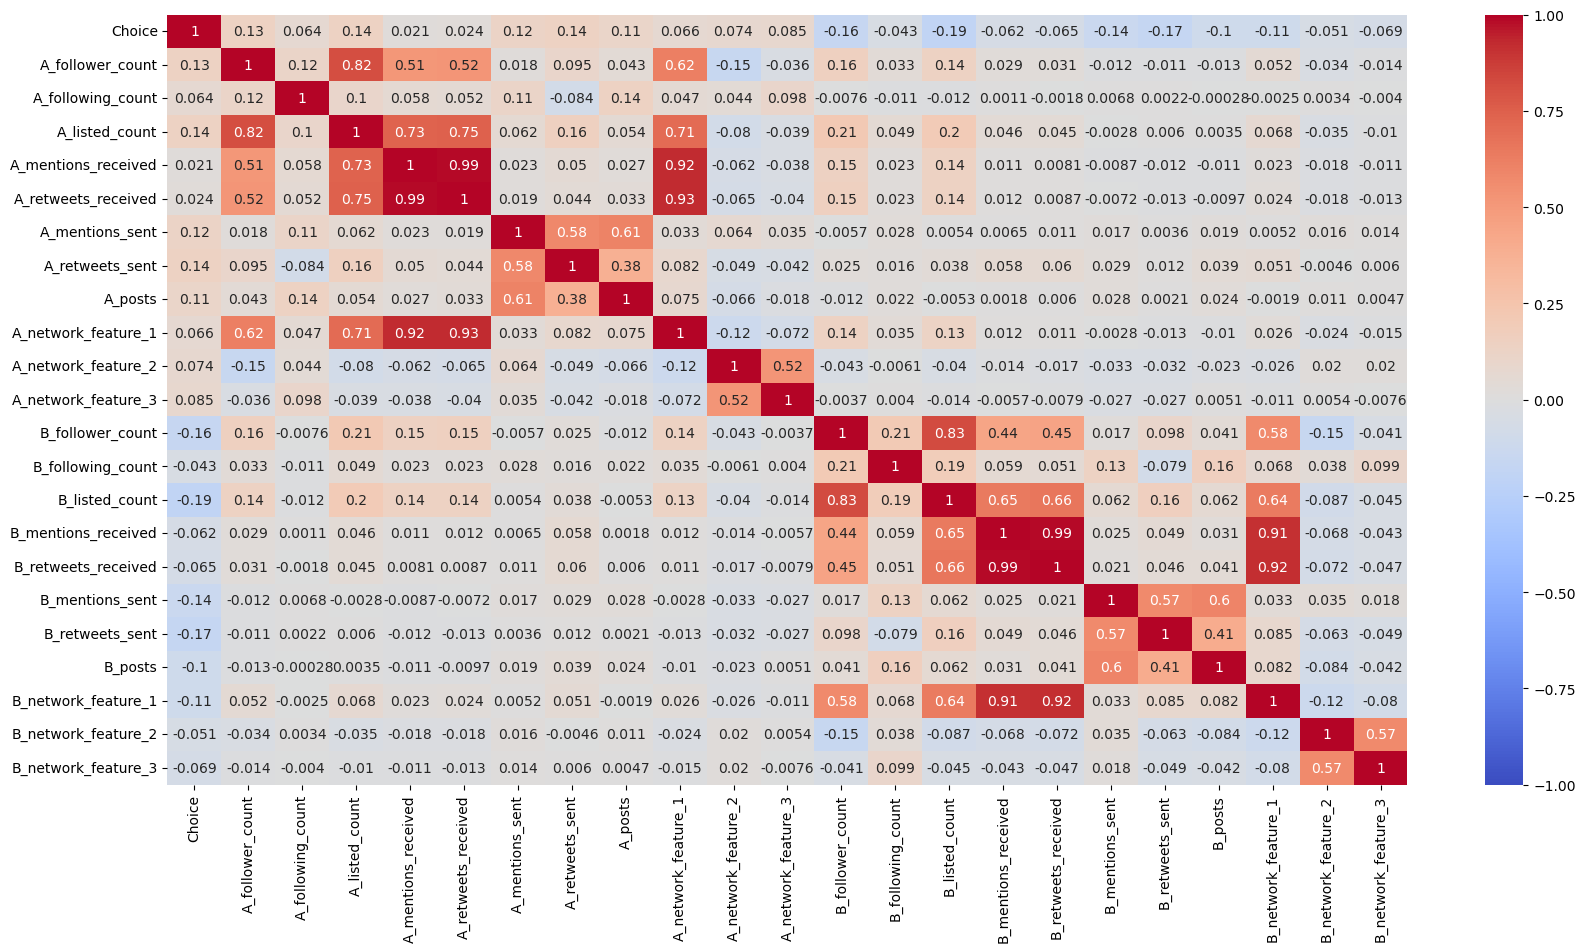

In [ ]:
#plot the correlation matrix of the fields as a heat map
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(source_train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

From the heat map, we see that the fields for Mentions_Received, Retweets_Received, Network_Feature_1 *(i.e degree)* have a high correlation.

To handle this, we remove the fields for Mentions_Received, Retweets_Received from our analysis input.

This is high correlation is also intuitively understandable as degree score is expected to related to retweet count or mention count. So, it is safe to say, that the information from the two removed fields would be captured by the retained field *Network_Feature_1*

In [ ]:
# Define the list of attributes to be used as the analysis input
reqd_columns_suffix = [
    col_name.replace('A_', '')  # Remove the 'A_' prefix from each column name
    for col_name in source_train_df.columns  # Iterate over column names in source_train_df
    if 'A_' in col_name  # Check if the column name contains the 'A_' prefix
    and col_name != 'A_mentions_received'  # Exclude 'A_mentions_received' column
    and col_name != 'A_retweets_received'  # Exclude 'A_retweets_received' column
]

reqd_columns_suffix

['follower_count',
 'following_count',
 'listed_count',
 'mentions_sent',
 'retweets_sent',
 'posts',
 'network_feature_1',
 'network_feature_2',
 'network_feature_3']

In our analysis, we are concerned about the relative values for the features for the two users instead of their individuals values.

So, to facilitate this, we also transform the features to hold the difference in the values for the features.

For example, *A-B_follower_count = A_follower_count - B_follower_count*

In [ ]:
#create the input dataset for the analysis
#feature engineering and removal of correlated features
train_df = source_train_df.__deepcopy__()
train_df.drop(['A_mentions_received', 'B_mentions_received'], axis=1, inplace=True)
train_df.drop(['A_retweets_received', 'B_retweets_received'], axis=1, inplace=True)
for column_name in reqd_columns_suffix:
    train_df['A-B_'+column_name] = train_df['A_'+column_name] - train_df['B_'+column_name]
    train_df.drop(['A_'+column_name, 'B_'+column_name], axis=1, inplace=True)


The resulting data is relatively uncorrelated compared to the previous set, and generally reduced in complexity.

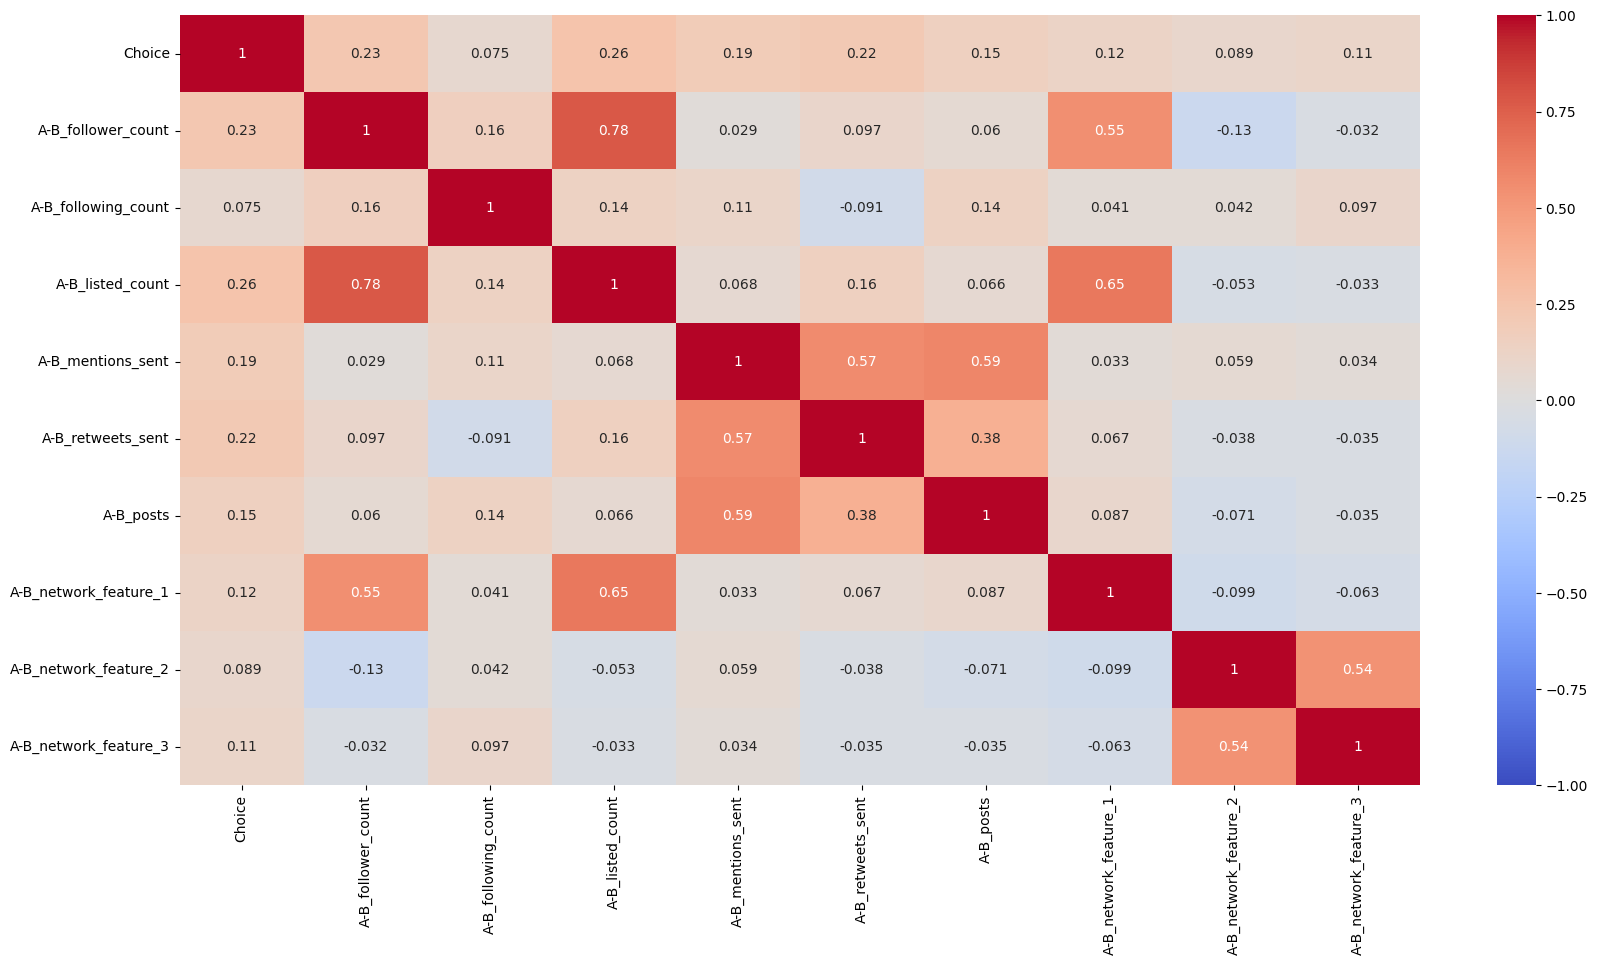

In [ ]:
#heat map/ correlation plot
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

The last preprocessing step is to normalize our data. This process allows variables with different unit values to all be standardized, ensuring that no one feature dominates the set due to having larger variance as a result of its unit measure.

In [ ]:
# Normalizing the data in train_df using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df_normalized = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

train_df_normalized.head()

,Choice,A-B_follower_count,A-B_following_count,A-B_listed_count,A-B_mentions_sent,A-B_retweets_sent,A-B_posts,A-B_network_feature_1,A-B_network_feature_2,A-B_network_feature_3
0,0.0,0.507400,0.347553,0.510798,0.447178,0.496772,0.482830,0.501019,0.659024,0.386341
1,0.0,0.507632,0.363888,0.511084,0.516176,0.521014,0.510640,0.501167,0.588358,0.335476
2,0.0,0.507932,0.364108,0.512285,0.531015,0.519267,0.507738,0.501104,0.647840,0.369221
3,0.0,0.507606,0.354055,0.512124,0.329091,0.283996,0.424157,0.500097,0.620181,0.336865
4,1.0,0.508414,0.363242,0.514698,0.637644,0.572905,0.550002,0.501308,0.654856,0.346725


###Model training
In order for us to find the model that best fits the task at hand, we tested many models and compared their accuracies. To do this, we first split the data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df_normalized.drop('Choice', axis=1)  # Features
y = train_df_normalized['Choice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***
The first model we tried was Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66       530
         1.0       0.68      0.71      0.69       570

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.68      0.68      0.68      1100



**However, the accuracy for Logistic Regression was pretty low at 0.68.**

***

To try and improve upon this, We then tried K nearest neighbors with cross validation

In [ ]:
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

random.seed(123)

# Defining the grid of hyperparameters to search through
params = {
    "n_neighbors" : [4, 8, 12, 16, 20],  # Number of neighbors to consider
    "weights" : ['uniform', 'distance'],  # Weighting strategy for neighbors
}

# Initializing GridSearchCV with KNeighborsClassifier as the estimator
# Searching through the defined parameter grid, optimizing for F1 score, and enabling verbose output
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1', verbose=3)

# Fitting the GridSearchCV object to the training data
clf.fit(X_train, y_train)

# Printing the best hyperparameters found during the search
print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.663 total time=   0.1s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.601 total time=   0.1s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.679 total time=   0.1s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.658 total time=   0.1s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.634 total time=   0.1s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.694 total time=   0.0s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.664 total time=   0.0s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.725 total time=   0.0s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.706 total time=   0.0s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END ....n_neighbors=8, weights=uniform;, score=0.708 total time=   0.1s
[CV 2/5] END ....n_neighbors=8, weights=uniform;

In [ ]:
# Creating a KNeighborsClassifier model with the best hyperparameters found
model = KNeighborsClassifier(**clf.best_params_)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       530
         1.0       0.72      0.69      0.71       570

    accuracy                           0.70      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.70      0.70      0.70      1100



**We do see that for KNN, the accuracy does increase to 0.70**
***

To try and improve upon this, We then tried using a Decision Tree with cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

random.seed(123)
# Defining the grid of hyperparameters to search through for Decision Tree Classifier
params = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]  # Maximum depth of the decision tree
}

# Initializing GridSearchCV with DecisionTreeClassifier as the estimator
# Searching through the defined parameter grid, optimizing for F1 score, and enabling verbose output
grid2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring='f1', verbose=3)

# Fitting the GridSearchCV object to the training data
grid2.fit(X_train, y_train)

# Printing the best hyperparameters found during the search
print(grid2.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5] END .......................max_depth=4;, score=0.791 total time=   0.0s
[CV 2/5] END .......................max_depth=4;, score=0.726 total time=   0.0s
[CV 3/5] END .......................max_depth=4;, score=0.769 total time=   0.0s
[CV 4/5] END .......................max_depth=4;, score=0.744 total time=   0.0s
[CV 5/5] END .......................max_depth=4;, score=0.758 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.776 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.741 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.775 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.755 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.778 total time=   0.0s
[CV 1/5] END .......................max_depth=6;, score=0.779 total time=   0.0s
[CV 2/5] END .......................max_depth=6;

In [ ]:
# Creating a DecisionTreeClassifier model with the best hyperparameters found
model = DecisionTreeClassifier(**grid2.best_params_)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       530
         1.0       0.75      0.75      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



**We  do see that for a Decision Tree, the accuracy does increase to 0.74**
***

**Expanding on the decision tree, we used a Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

random.seed(123)

# Defining the grid of hyperparameters to search through for RandomForestClassifier
params = {
    'max_depth': [3, 5, 10, 15, 20, 30],        # Maximum depth of the trees in the forest
    'n_estimators': [25, 100, 150]              # Number of trees in the forest
}

# Initializing GridSearchCV with RandomForestClassifier as the estimator
# Searching through the defined parameter grid, optimizing for F1 score, and enabling verbose output
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='f1', verbose=3)

# Fitting the GridSearchCV object to the training data
grid2.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......max_depth=3, n_estimators=25;, score=0.786 total time=   0.2s
[CV 2/5] END ......max_depth=3, n_estimators=25;, score=0.741 total time=   0.2s
[CV 3/5] END ......max_depth=3, n_estimators=25;, score=0.771 total time=   0.2s
[CV 4/5] END ......max_depth=3, n_estimators=25;, score=0.757 total time=   0.2s
[CV 5/5] END ......max_depth=3, n_estimators=25;, score=0.778 total time=   0.2s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.784 total time=   0.6s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.752 total time=   0.7s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.774 total time=   1.2s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.759 total time=   0.8s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.774 total time=   1.2s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.781 total time=   1.8s
[CV 2/5] END .....max_depth=3, n_estimators=150;

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 30],
                         'n_estimators': [25, 100, 150]},
             scoring='f1', verbose=3)

In [ ]:

# Creating a RandomForestClassifier model with the best hyperparameters found
model_random = RandomForestClassifier(**grid2.best_params_)

# Fitting the model to the training data
model_random.fit(X_train, y_train)

# Making predictions on the test data
y_pred_random = model_random.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       530
         1.0       0.79      0.77      0.78       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



**Here, Random Forest pushed the accuracy up to 0.77**
***

**Finally boosting matched random forest's accuracy at 0.77**

In [ ]:
random.seed(123)


# Defining the grid of hyperparameters to search through for GradientBoostingClassifier
params = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [4, 6, 8]  # Maximum depth of the individual trees
}

# Initializing GridSearchCV with GradientBoostingClassifier as the estimator
# Searching through the defined parameter grid, optimizing for F1 score, and enabling verbose output
grid2 = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, scoring='f1', verbose=3)

# Fitting the GridSearchCV object to the training data
grid2.fit(X_train, y_train)

# Creating a GradientBoostingClassifier model with the best hyperparameters found
model = GradientBoostingClassifier(**grid2.best_params_)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.787 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.756 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.776 total time=   1.5s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.763 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.782 total time=   1.5s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.788 total time=   3.5s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.752 total time=   3.4s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.777 total time=   3.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.764 total time=   3.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.7

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76       530
         1.0       0.78      0.77      0.78       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



***
***
Taking these factors into consideration, we feel that **Random Forest is the model to be used**. Eventhough, the accuracy of both Random Forest as well as Gradient Boosting is the same at 0.77, the training time for Random Forest is lower.

Thus the classification report for the recommended model is as follows.

In [ ]:
# Making predictions on the test data
y_pred_random = model_random.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76       530
         1.0       0.78      0.77      0.78       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



***
Now to interpret the predictors of influence, we can use the results from the Logistic Regression.

If we look at the feature importance from the Logistic Regression model, we observe the following

In [ ]:

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg_model.coef_[0]})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Display the coefficients, sorted by absolute coefficient value
sorted_coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coefficients)

                 Feature  Coefficient  Abs_Coefficient
0     A-B_follower_count     7.391954         7.391954
2       A-B_listed_count     5.712535         5.712535
4      A-B_retweets_sent     4.284029         4.284029
7  A-B_network_feature_2     2.701191         2.701191
8  A-B_network_feature_3     2.548791         2.548791
6  A-B_network_feature_1     2.056541         2.056541
1    A-B_following_count     1.934663         1.934663
3      A-B_mentions_sent     1.627347         1.627347
5              A-B_posts     0.961734         0.961734


The above analysis reveals that

- Follower Count is an important feature in the exercise of predicting influence of an user. This is intuitive in a way, as larger the follower count of a user, greater would be the outreach for the user.

- Attributes as Listed Count *(i.e. the Number of Public tweets the user is a member of)* also play an important role. This in a way, indicates the number of chances for engagement. Thus, say in a social awareness campaign, the campaign manager should account for this feature while deciding the ambassador for the campaign.

- Moreover, Network_Feature_2, Network_Feature_3, Network_Feature_1 (i.e. betweeness, closeness, degree) also play a significant role in this decision. Thus, say in a marketing campaign, the campaign manager should also factor in the betweeness, closeness, degree scores of the user.

- In some cases, a user might not have the highest follower count but might be very strategically connected across cliques. In this case, the weights or importance determined above would help us quantitatively identify if the user should be beneficial for the said campaign.

# ***Part 1*** *- Calculate the Financial Value of the Model*

In this case, If an influencer tweets once for the promotion of a product, there is a 0.01% chance that his/her followers will buy one unit of a product. If an influencer tweets twice, the overall buying probability will be 0.015%.

Without analytics, the retailer offers 5 dollars to each person to tweet once. With analytics, the retailer offers 10 dollars to those identified as influencers by the model to send two tweets each.

The retailer has a profit margin of 10 dollars per unit.

Taking this into account, we want to find out lift in expected net profit from using the above recommended analytic model (versus not using analytics)?

In [ ]:
source_train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [ ]:
#calculate value for each user pair if there is no analytics model
def get_value(row):
    value = 0
    cost = 10
    if row["Choice"] == 1:
        #value from converting followers of A
        value = row["A_follower_count"] * 0.01 * 0.01 * 10 - cost
    else:
        #value from converting followers of B
        value = row["B_follower_count"] * 0.01 * 0.01 * 10 - cost

    return value

In [ ]:
value_df = source_train_df.__deepcopy__()

# Adding a new column "Revenue" store the revenue without any analytics model
value_df["Revenue"] = value_df.apply(get_value, axis=1)


In [ ]:
# Making our prediction using the analytics model
y_inf_pred = model_random.predict(X)

value_df["Influencer_Prediction"] = y_inf_pred

In [ ]:
def inf_get_value(row):
    value = 0
    cost = 10
    if row["Choice"] == 1 and row["Influencer_Prediction"] == 1:
        #value from converting followers of A, if A tweets twice and is the influencer
        value = row["A_follower_count"] * 0.015 * 0.01 * 10 - cost
    elif row["Choice"] == 0 and row["Influencer_Prediction"] == 0:
        #value from converting followers of B, if B tweets twice and is the influencer
        value = row["B_follower_count"] * 0.015 * 0.01 * 10 - cost
    else:
        #if the model prediction is incorrect
        value = - cost

    return value

In [ ]:
# Adding a new column "Influencer_Revenue" store the revenue with the analytics model
value_df["Influencer_Revenue"] = value_df.apply(inf_get_value, axis=1)

In [ ]:
#revenue generated with analytical model
value_df['Influencer_Revenue'].sum()

7807514.739499999

In [ ]:
#revenue generated without analytical model
value_df['Revenue'].sum()

5321568.593

In [ ]:
print("The lift in expected net profit from using the analytics model is :", value_df['Influencer_Revenue'].sum()- value_df['Revenue'].sum(),"dollars")

The lift in expected net profit from using the analytics model is : 2485946.146499999 dollars


**Thus, we see that the lift in expected profit if we use the trained analytics model versus no model is around 2.4 million dollars**

In [ ]:
def ideal_inf_get_value(row):
    value = 0
    cost = 10
    if row["Choice"] == 1:
        #value from converting followers of A, if A tweets twice and is the influencer
        value = row["A_follower_count"] * 0.015 * 0.01 * 10 - cost
    elif row["Choice"] == 0:
        #value from converting followers of B, if B tweets twice and is the influencer
        value = row["B_follower_count"] * 0.015 * 0.01 * 10 - cost

    return value

In [ ]:
# Adding a new column "Ideal_Influencer_Revenue" store the revenue with a perfect analytics model
value_df["Ideal_Influencer_Revenue"] = value_df.apply(ideal_inf_get_value, axis=1)

In [ ]:
#revenue generated with a perfect analytical model
value_df['Ideal_Influencer_Revenue'].sum()

8009852.8895

In [ ]:
print("The lift in expected net profit from using a perfect analytics model is :", value_df['Ideal_Influencer_Revenue'].sum()- value_df['Revenue'].sum(),"dollars")

The lift in expected net profit from using a perfect analytics model is : 2688284.2964999992 dollars


**Moreover, we see that the lift in expected profit if we use a perfect analytics model versus no model is around 2.6 million dollars**

# ***Part 2*** *- Finding Influncers From Twitter*

The file "tweets_sample.csv" is being used as our input here. This is a sample of tweets and other related information.

From this input, we will parse the twitter content to find out the network within the same. We will also plot the same to explore and observe the network characteristics.

Moreover, we will determine the degree, betweeness and  closeness of each node/user in this network and using these attributes determine the top 20 inlfuencers in this network.

In [ ]:
#read the tweets file
tweets_df = pd.read_csv("tweets.csv")

tweets_df.head(5)

,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,1.410000e+18,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...
1,1.050000e+18,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...
2,1.360000e+18,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul..."
3,3.617900e+09,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...
4,1.360000e+18,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...


We will first, pass the tweets through a parser to establish the user connected network.

In [ ]:
#creating a parser to obtain retweeted, mentioned, replieed to or orginal tweet generating acounts along with the directed acoount

import re
import pandas as pd


tweet_df = pd.DataFrame(columns=['Column_1', 'Column_2', 'Column_3'])

# Looping through each row in the tweets_df DataFrame
for i in range(len(tweets_df)):
    text = tweets_df.iloc[i]["text"]
    sender_acct = tweets_df.iloc[i][" screen_name"]

    retweet_acct = ''
    reply_acct = []
    mention_acct = []

    retweet_pattern = r"RT @(.*?):"

    try:
        # Extract the retweeted account
        retweet_acct = re.findall(retweet_pattern, text)[0]

        #Create record for retweeted account and original twitter account
        data = {'Column_1': [sender_acct, retweet_acct], 'Column_2': [retweet_acct]*2, 'Column_3': ['Retweet','Tweet']}
        tweet_row_df = pd.DataFrame(data)

    except:
        retweet_acct = ''

        mention_and_reply_pattern = r"@(.*?) "

        # Finding all mentioned and reply accounts
        mentioned_and_reply_acct = re.findall(mention_and_reply_pattern, text)

        # Separating reply accounts and mention accounts
        for acct in mentioned_and_reply_acct:
            if text.startswith('@'+acct):
                reply_acct.append(acct)
                text = text.replace('@'+acct,'').strip()

        mention_acct = [acct for acct in mentioned_and_reply_acct if acct not in reply_acct]

        if (len(reply_acct) + len(mention_acct)) > 0:
            data = {'Column_1': [sender_acct]*(len(reply_acct) + len(mention_acct)),
                    'Column_2': reply_acct+mention_acct,
                    'Column_3': (['Reply']*len(reply_acct)) + (['Mention']*len(mention_acct))}

            tweet_row_df = pd.DataFrame(data)

        else:
            # Creating a record for original tweet
            data = {'Column_1': [sender_acct], 'Column_2': [sender_acct], 'Column_3': ['Tweet']}
            tweet_row_df = pd.DataFrame(data)

    # Appending the DataFrame row to the main DataFrame
    tweet_df = tweet_df.append(tweet_row_df, ignore_index=True)

# Dropping duplicate rows from the DataFrame
tweet_df = tweet_df.drop_duplicates()

# Saving the DataFrame to a CSV file
tweet_df.to_csv("Network_Input.csv")


***
Now, that we have the details for the network connection, we will try to visualize the same to see if we can extract some insight from it.

We are using Gephi *(a Java based Graph Visualization platform)* for this purpose.

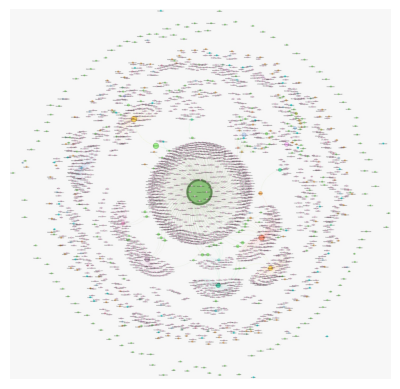

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('Based on Betweenness.jpeg')
plt.pyplot.imshow(img)
plt.pyplot.axis('off')
plt.pyplot.show()

We wanted to see what the network looked like for twitter handles that had the highest betweenness score. The higher the score, the larger the size of the node. In the case of this dataset, **Cernovich** had the highest betweenness score indicating that these nodes were pivotal in joining different groups of nodes todegether.

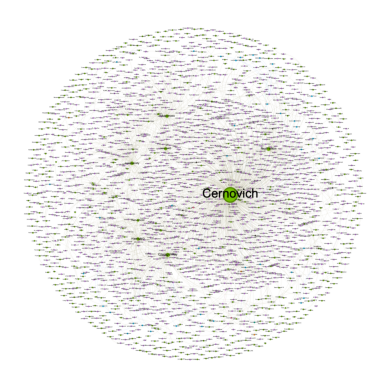

In [ ]:
img = mpimg.imread('Based on Degree and Centrality.png')
plt.pyplot.imshow(img)
plt.pyplot.axis('off')
plt.pyplot.show()

In this network, the Twitter handles with the highest weighted in-degree score are represented with large node size. In this case, the Twitter handle **Cernovich** has the highest degree score suggesting that he has the highest number of retweets and that he is the one receiving the most attention.

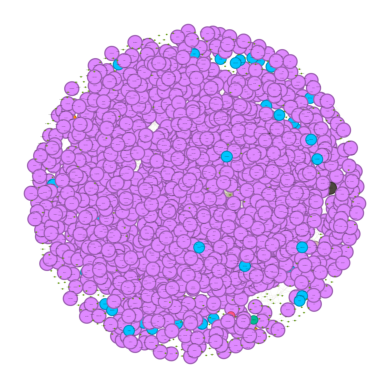

In [ ]:
img = mpimg.imread('Based on Closeness.png')
plt.pyplot.imshow(img)
plt.pyplot.axis('off')
plt.pyplot.show()

This figure shows the closeness centrality. Purple represents high scores while green represents low scores and cyan represents a score of 0.67.

***


Following this, we want to see if we can identify these "influencers" from the data without visualization.

To do so, we first need to ***calculate the network characteristics - degree, betweeness and closeness.***

We will use NetworkX for this purpose here.

In [ ]:
import networkx as nx  # Importing the NetworkX library for network analysis

# tuple of all the connected users
tuples_list = tweet_df[['Column_1', 'Column_2']].apply(lambda row: tuple(row), axis=1).tolist()

# Creating an undirected graph from the list of tuples
twitter_graph = nx.Graph()
twitter_graph.add_edges_from(tuples_list)

# Calculating degree centrality for each node in the graph
degree_centrality = nx.degree_centrality(twitter_graph)

# Calculating betweenness centrality for each node in the graph
betweenness_centrality = nx.betweenness_centrality(twitter_graph)

# Calculating closeness centrality for each node in the graph
closeness_centrality = nx.closeness_centrality(twitter_graph)



In [ ]:
#creating a dataframe with the network features
node_arr = []
degree_arr = []


for node, degree in degree_centrality.items():
    degree_arr.append(degree)
    node_arr.append(node)

betweenness_arr = []

for node, betweenness in betweenness_centrality.items():
    betweenness_arr.append(betweenness)

closeness_arr = []

for node, closeness in closeness_centrality.items():
    closeness_arr.append(closeness)

graph_features_data = {'Node': node_arr, 'Degree': degree_arr, 'Betweenness': betweenness_arr, 'Closeness': closeness_arr}

graph_df = pd.DataFrame(graph_features_data)

graph_df.head()


,Node,Degree,Betweenness,Closeness
0,2Sherryazar1956,0.000904,0.000077,0.138963
1,jimmichael720,0.002260,0.000835,0.166857
2,TrueCrimePoli,0.000452,0.000000,0.000452
3,ChrisStigall,0.001356,0.000000,0.000452
4,WintWahLwin15,0.000452,0.000000,0.004937


***
Now, to determine the "influencer score" *(i.e. the influencial effect of a user)*, we will use the model weights calculated in Part 1.

Note: From the Twitter Network, we cannot calculate the value of all the predictors present in the model in Part 1. So we will only focus on the three fields we can evaluate here - degree, betweeness, closeness.

Again, we are assuming the weights for A-B features is analogous to the user specific weight contribution.

In [ ]:
degree_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_1"]["Coefficient"].item()

betweenness_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_2"]["Coefficient"].item()

closeness_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_3"]["Coefficient"].item()

normalization_value = degree_weight + betweenness_weight + closeness_weight

degree_weight = degree_weight / normalization_value

betweenness_weight = betweenness_weight / normalization_value

closeness_weight=closeness_weight / normalization_value

In [ ]:
print("Contribution for degree ,betweenness ,closeness are as follows:",degree_weight,betweenness_weight,closeness_weight)

Contribution for degree ,betweenness ,closeness are as follows: 0.2814664996941657 0.3696957458513683 0.348837754454466


Thus, we see that in our model, **Betweeness has the highest
contribution followed by Closeness and Degree.**
***
Now, if we try to determine the top 20 influencers, we can calculate the *influencer score*

In [ ]:
#function for calculating influencer score
def get_influencer_score(row):
    value = (row["Degree"]*degree_weight + row["Betweenness"]*betweenness_weight + row["Closeness"]*closeness_weight )
    return value

***
**Thus, the top 20 influencers are as follows**

In [ ]:
#sorting and creating our list of top 20 influencers
graph_df["Influencer_Score"] = graph_df.apply(get_influencer_score, axis=1)
graph_df.sort_values(by='Influencer_Score', ascending=False).head(20)

,Node,Degree,Betweenness,Closeness,Influencer_Score
80,Cernovich,0.252260,0.263046,0.233441,0.249683
9,Chicago1Ray,0.045208,0.045024,0.149516,0.081527
526,BBeb1997,0.000904,0.044411,0.171446,0.076480
22,RepFranklin,0.038427,0.036935,0.141278,0.073754
1024,dYu7vug97v2Qcqh,0.011302,0.028739,0.171354,0.073580
35,seanhannity,0.032550,0.045914,0.135412,0.073373
645,CliffShew,0.001356,0.023679,0.177624,0.071098
285,Jereme45,0.029837,0.033987,0.137968,0.069091
72,HawleyMO,0.032550,0.032173,0.133423,0.067599
172,Crash_the_Flash,0.000904,0.015447,0.168717,0.064820


From the top 20 influencers, we see that ***Cernovich*** has the highest score, making him the most influencial account.

We had also noticed the same account in the network visualizations. This is understandable due the high contribution of the Betweeness score to the overall "infleuncer power". The influencer would be someone who can connect to a wide range of audience members.